First let us practice Without Dataset

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
x= np.array([1.11,2.11,3.34,1.55,5.66,2.45,1.93,4.33,6.15,2.27,3.90,4.45,2.31,3.29,5.39,4.98,5.88,6.24]).reshape(-1,1)
y= np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1])

In [3]:
logist_reg= LogisticRegression()
logist_reg.fit(x,y)

LogisticRegression()

In [4]:
#predict if tumor is cancerous where the size is 4.91mm:

predict= logist_reg.predict(np.array([4.91]).reshape(-1,1))
print(predict)

[1]


In [5]:
#First, let's define odds. Odds represent the ratio of the probability of an event happening to the probability
#of it not happening. For an event with probability 𝑝:
#Odds= 𝑝/ (1−𝑝)
#The log-odds, also known as the logit function, is simply the natural logarithm of the odds.
#Mathematically, it can be expressed as: log(Odds)

def logit_to_probab(logist_reg, x):
    log_odds= logist_reg.coef_ * x + logist_reg.intercept_
    odds= np.exp(log_odds)
    probability= odds / (1+odds)
    return probability

In [6]:
print(logit_to_probab(logist_reg, x))

[[0.26015436]
 [0.34360167]
 [0.46060923]
 [0.29523381]
 [0.68248061]
 [0.37472363]
 [0.32763449]
 [0.55873078]
 [0.72315329]
 [0.35809921]
 [0.51622517]
 [0.5704674 ]
 [0.36176576]
 [0.45567061]
 [0.65875864]
 [0.62119787]
 [0.70113934]
 [0.73026483]]


1.11 0.26 The probability that a tumor with the size 1.11cm is cancerous is 26%.

Let us now work with dataset

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [8]:
diabetics= load_diabetes()
#diabetics

In [9]:
df_diabetics= pd.DataFrame(diabetics.data)
df_diabetics.columns= diabetics.feature_names
df_diabetics

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [10]:
#The .astype(int) method converts the boolean array into an integer array. In this new array:
#True becomes 1; False becomes 0

x, y= diabetics.data, diabetics.target
#print(x)
#print(y)

In [11]:
y_bin = (y > np.median(y)).astype(int)
#y_bin

In [12]:
x_train, x_test, y_train, y_test= train_test_split(x, y_bin, test_size=0.2, random_state=42)

In [13]:
scalar= StandardScaler()
x_train= scalar.fit_transform(x_train)
x_test= scalar.transform(x_test)

#The StandardScaler instance is created; this will be used to standardize the features.
#t uses the scaler’s fit_transform method to normalize the training data (X_train) and
#determine its mean and standard deviation. Then, itstandardizes the testing data (X_test) using
#the calculated mean and standard deviation from the training set. Model training and evaluation are
#made easier by standardization, which guarantees that the features have a mean of 0 and a standard deviation of 1.

In [14]:
model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [15]:
y_pred= model.predict(x_test)

In [16]:
compare_df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_df= compare_df.reset_index(drop=True)
compare_df

,Actual,Predicted
0,1,0
1,0,1
2,1,0
3,1,1
4,0,0
...,...,...
84,1,0
85,0,0
86,0,0
87,0,0


In [17]:
model.score(x_test, y_test) * 100

73.03370786516854

In [18]:
accuracy= metrics.accuracy_score(y_test, y_pred)
acc_rate = accuracy*100
print("Accuracy is {:.2f}%".format(acc_rate))
#or, model.score(x_test, y_test) * 100

Accuracy is 73.03%


In [19]:
conf_mat= metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrics is:\n", conf_mat)

Confusion Matrics is:
 [[36 13]
 [11 29]]


In [20]:
class_report= metrics.classification_report(y_test, y_pred)
print("Classification Report is:\n", class_report)

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



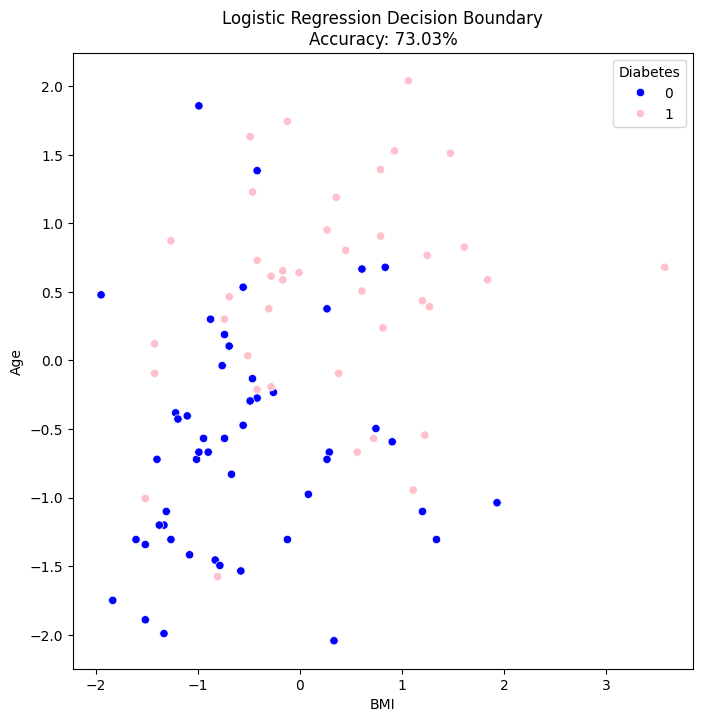

In [21]:
plt.figure(figsize=(8,8))
#sns.scatterplot(x= x_test[:, 2], y= x_test[:, 0], hue=y_test, palette={0: 'blue', 1:'pink'}, markers='o')
sns.scatterplot(x=x_test[:, 2], y=x_test[:, 8], hue=y_test, palette={
                0: 'blue', 1: 'pink'}, marker='o')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(acc_rate))
plt.legend(title='Diabetes', loc="upper right")
plt.show()